In [74]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
%matplotlib inline

<style>
  .custom-title {
    color: black;
    font-family: 'Arial';
    font-size: 3.5em;
  }
</style>
<div class="custom-title">Predicting Diabetes Using Machine Learning Project</div>


<style>
.highlight {
    background-color: #1A1C22; /* Background color */
    font-weight: bold;
    color: #FFFFFF; /* Text color */
    text-align: center; /* Center the text */
}
</style>
<p class="highlight">CRISP-DM Methodology</p>

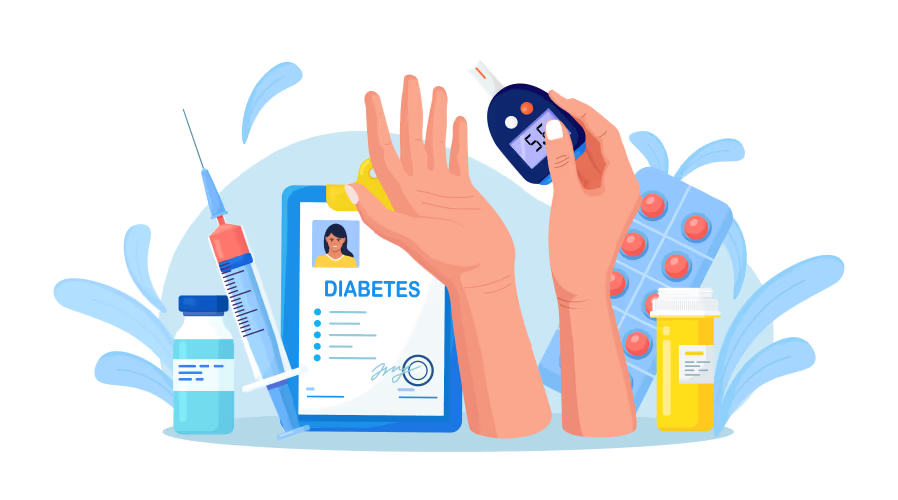

In [4]:
from IPython.display import display, HTML
from IPython.display import Image
image_path = 'C:\\Users\\me\\OneDrive\\Bureau\\final_diabete_project\\CODE\\assets\\four.png'
Image(filename=image_path)

## *Table of Contents*
1. [Introduction](#Introduction)
2. [Business Understanding](#Business-Understanding)
3. [Data Understanding](#Data-Understanding)
4. [Data Preparation](#Data-Preparation)
5. [Modeling](#Modeling)
6. [Deployment](#Deployment)


<style>
  .custom-title {
    color: #00308F;
    font-family: 'Arial';
    font-size: 2em;
  }
</style>
<div class="custom-title">1. Introduction</div>

* Diabetes is a chronic medical condition characterized by high levels of glucose (sugar) in the blood. It can lead to serious health complications such as heart disease, kidney failure, blindness, and lower limb amputations if not managed properly. Early detection and management of diabetes are crucial to prevent these complications and improve the quality of life for individuals affected by the disease.

* The task at hand is to develop a predictive model that can accurately identify whether an individual has diabetes based on various health parameters. This involves analyzing a dataset containing information about several factors that may influence the likelihood of diabetes, such as glucose levels, blood pressure, body mass index (BMI), and more.

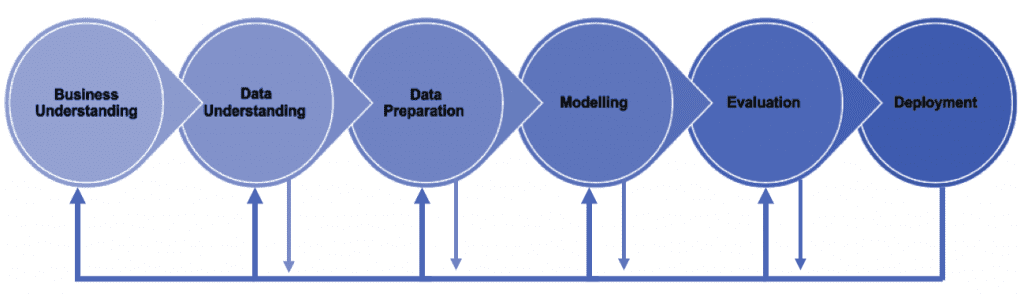

In [5]:
from IPython.display import Image
image_path = 'C:\\Users\\me\\OneDrive\\Bureau\\final_diabete_project\\CODE\\assets\\CRISP.png'
Image(filename=image_path)


<style>
  .custom-title {
    color: #00308F;
    font-family: 'Arial';
    font-size: 2em;
  }
</style>

<div class="custom-title">2. Business Understanding</div>

The primary objective of this project is to develop a predictive model that can identify individuals at risk of diabetes using their health-related data. This model will assist healthcare providers in making informed decisions regarding early interventions and treatments. The specific objectives include:

* Understanding the dataset and identifying key factors that influence diabetes.
* Preprocessing and cleaning the data to ensure its suitability for modeling.
* Training and evaluating various machine learning models to determine the best-performing one.
* Deploying the final model to provide a practical tool for healthcare professionals.
Success Criteria
The success of this project will be determined by the following criteria:

Model Performance: The predictive model should achieve high accuracy, precision, recall, and F1 score. The ROC-AUC score will also be used to evaluate the model's ability to distinguish between positive and negative cases.

Actionable Insights: The project should provide insights into the most significant predictors of diabetes, helping healthcare providers understand which factors are most important for early detection.

Deployment Feasibility: The model should be easily deployable as a web service or mobile application, making it accessible for real-world use.


<style>
  .custom-title {
    color: #00308F;
    font-family: 'Arial';
    font-size: 2em;
  }
</style>
<div class="custom-title">3. Data Understanding</div>

<p style="color:purple;">Libray importation.</p>

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas.plotting import scatter_matrix
import missingno as msno
from prettytable import PrettyTable
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score , f1_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter 
from sklearn.neighbors import KNeighborsClassifier
import joblib

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1.5em;
  }
</style>
<div class="custom-title">Step 1: Data Collection</div>

<p style="color:purple;">Loading data</p>

In [7]:
data=pd.read_csv('C:\\Users\\me\\OneDrive\\Bureau\\final_diabete_project\\CODE\\diabete_code\\diabetes-2.csv')
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

<p style="color:purple;">Checking data head </p>
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [8]:
# Preview data
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1.5em;
  }
</style>
<div class="custom-title">Step 2: Data Description</div>

<p style="color:purple;">Information about the dataset</p>

- The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

    - Columns :
        1. Pregnancies : Number of times pregnant
        2. Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
        3. BloodPressure : Diastolic blood pressure (mm Hg)
        4. SkinThickness : Triceps skin fold thickness (mm)
        5. Insulin : 2-Hour serum insulin (mu U/ml)
        6. BMI : Body mass index (weight in kg/(height in m)^2)
        7. DiabetesPedigreeFunction : Diabetes pedigree function
        8. Age : Age (years)
        9. Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [9]:
# Display the number of rows and columns
print("Number of rows and columns:", data.shape)
# Display data types of each column
print("Data types of each column:")
print(data.dtypes)
# Display a brief description of each variable
print("Description of each variable:")
print(data.describe())

Number of rows and columns: (768, 9)
Data types of each column:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
Description of each variable:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      

<p style="color:purple;">Tolal number of columns in the dataset</p>

In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1.5em;
  }
</style>
<div class="custom-title">Step 2: Data Exploration</div>

In [12]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Create an interactive histogram using Plotly Express
fig = px.histogram(data, x='Age', nbins=10, title='Histogram of Age',
                   labels={'Age': 'Age', 'count': 'Frequency'}, 
                   color_discrete_sequence=['#636EFA'])

# Customize the layout
fig.update_layout(
    title_text='Histogram of Age',
    xaxis_title_text='Age',
    yaxis_title_text='Frequency',
    bargap=0.2, # Gap between bars
    template='plotly_dark' # Dark theme
)

# Show plot
fig.show()


First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1.5em;
  }
</style>
<div class="custom-title">Step 3: Data Quality</div>

<p style="color:purple;">Values null</p>

In [13]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print("Duplicate Rows:")
print(duplicate_rows)

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Duplicate Rows:
0


In [14]:
data.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1.5em;
  }
</style>
<div class="custom-title">Step 4: Data Relationships</div>

In [15]:
# Compute correlation matrix
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose              

<style>
.highlight {
    background-color: lightpink;
    font-weight: bold;
}
</style>
<p class="highlight">Observations:</p>


There are a total of 768 records and 9 features in the dataset.
Each feature can be either of integer or float dataype.
Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
There are zero NaN values in the dataset.
In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.

<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1.5em;
  }
</style>
<div class="custom-title">Step 5: Data Visualization</div>

<style>
  .custom-title {
    color: #0000FF;
    font-family: 'Arial' , 'bold';
    font-size: 1.25em;
  }
</style>
<div class="custom-title">Explore Data Analysis (EDA)</div>


<style>
  .custom-title {
    color: #E9967A;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">1. Univariate Analysis</div>

<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">- Age</div>


In [16]:
import plotly.graph_objects as go
import pandas as pd

# Create a custom table using Plotly
table = go.Figure(data=[go.Table(
    header=dict(values=["Outcome", "Mean Age"],
                fill_color='paleturquoise',
                align='center'),
    cells=dict(values=[data.groupby("Outcome").agg({"Age": "mean"}).index,
                       data.groupby("Outcome").agg({"Age": "mean"})["Age"].round(2)],
               fill_color='lavender',
               align='center'))
])

# Update layout
table.update_layout(title='Mean Age by Outcome')

# Show table
table.show()


<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">- Groups data by "Outcome" and finds the maximum age for each group</div>


In [17]:

# Create a custom table using Plotly
table = go.Figure(data=[go.Table(
    header=dict(values=["Outcome", "Max Age"],
                fill_color='paleturquoise',
                align='center'),
    cells=dict(values=[data.groupby("Outcome").agg({"Age": "max"}).index,
                       data.groupby("Outcome").agg({"Age": "max"})["Age"]],
               fill_color='lavender',
               align='center'))
])

# Update layout
table.update_layout(title='Maximum Age by Outcome')

# Show table
table.show()


<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">-To Create and show a box plot of ages as seen the Age varies between 18 and 21</div>

In [18]:
fig = px.box(data_frame=data, y='Age')
fig.show()

 <style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">-The histogram helps in understanding the age distribution of the dataset, showing that most individuals are younger, with fewer older individuals</div>

In [19]:
# The histagram of the Age variable was reached.
fig = px.histogram(data_frame=data, x='Age', nbins=20)
fig.show()

<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">-This histogram of the "Age" variable using Bokeh. It generates random age data, initializes a Bokeh plot, calculates the histogram with NumPy, and plots it as rectangular bars. The show(p) function renders the histogram in a Jupyter notebook, visualizing the age distribution.</div>

In [20]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import pandas as pd
import numpy as np
# Sample data
np.random.seed(0)
data = pd.DataFrame({
    'Age': np.random.randint(20, 80, 100)
})

output_notebook()


# Create a new Bokeh plot
p = figure(title='Histogram of Age', x_axis_label='Age', y_axis_label='Frequency')

# Calculate histogram
hist, edges = np.histogram(data['Age'], bins=20)

# Plot histogram
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color='white')

show(p)

Loading BokehJS ...

In [21]:
# Violinplot of a numerical variable by a categorical variable (e.g., Age by Outcome)
data=pd.read_csv('C:\\Users\\me\\OneDrive\\Bureau\\final_diabete_project\\CODE\\diabete_code\\diabetes-2.csv')
data
fig = px.violin(data_frame=data, x='Outcome', y='Age', color='Outcome',
                title='Violinplot of Age by Outcome', violinmode='overlay')
fig.show()

<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">- BMI</div>

- Box Plots by Category: To compare distributions of a continuous variable across different categories, such as BMI by Outcome.

In [22]:
fig = px.box(data_frame=data, y='BMI')
fig.update_layout(title='Box Plot of BMI')
fig.show()

<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">- Glucose</div>

In [23]:
fig = px.histogram(data_frame=data, x='Glucose', nbins=30)
fig.update_layout(xaxis_title='Glucose Level', yaxis_title='Frequency', title='Distribution of Glucose Levels')
fig.show()

In [24]:
# Boxplot of a numerical variable (e.g., Glucose)

fig = px.box(data_frame=data, x='Outcome', y='Glucose', color='Outcome',
             title='Boxplot of Glucose by Outcome')
fig.show()

In [25]:
fig = px.violin(data_frame=data, x='Outcome', y='Glucose', color='Outcome',
                title='Violinplot of Glucose by Outcome', violinmode='overlay')
fig.show()

<Axes: xlabel='Outcome', ylabel='count'>

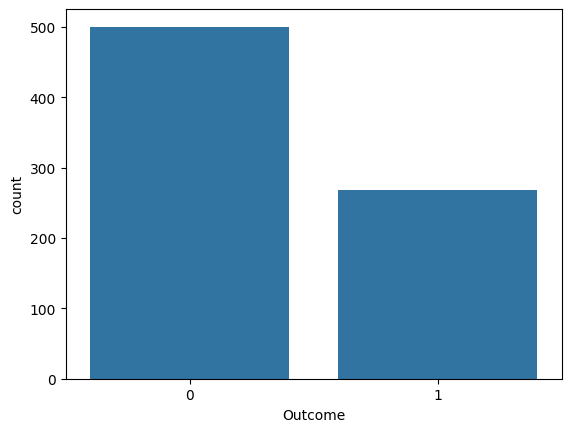

In [26]:
sns.countplot(x='Outcome',data=data)

In [27]:
# Create an interactive bar chart using Plotly Express
fig = px.bar(data, x='Outcome', title='Count Plot of Outcome',
             labels={'Outcome': 'Outcome', 'count': 'Count'},
             color_discrete_sequence=['#A3E4D7', '#F7DC6F'])

# Customize the layout
fig.update_layout(
    title_text='Count Plot of Outcome',
    xaxis_title_text='Outcome',
    yaxis_title_text='Count',
    template='plotly_white'  # Light theme
)

# Show plot
fig.show()

In [28]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [29]:
# Create a custom table using Plotly
table = go.Figure(data=[go.Table(
    header=dict(values=["Outcome", "Mean Age", "Mean BMI", "Mean Glucose", "Mean Insulin", "Mean SkinThickness", "Mean BloodPressure", "Mean DiabetesPedigreeFunction", "Mean Pregnancies"],
                fill_color='paleturquoise',
                align='center'),
    cells=dict(values=[data.groupby("Outcome").mean().index,
                       data.groupby("Outcome").mean()["Age"].round(2),
                       data.groupby("Outcome").mean()["BMI"].round(2),
                       data.groupby("Outcome").mean()["Glucose"].round(2),
                       data.groupby("Outcome").mean()["Insulin"].round(2),
                       data.groupby("Outcome").mean()["SkinThickness"].round(2),
                       data.groupby("Outcome").mean()["BloodPressure"].round(2),
                       data.groupby("Outcome").mean()["DiabetesPedigreeFunction"].round(2),
                       data.groupby("Outcome").mean()["Pregnancies"].round(2)],
               fill_color='lavender',
               align='center'))
])

# Update layout
table.update_layout(title='Mean Values by Outcome')

# Show table
table.show()


<p style="color:black;">- To understand the distribution of individual continuous variables like Glucose, BloodPressure, SkinThickness, Insulin, BMI, and Age.</p>

In [30]:
for column in data.select_dtypes(include=['number']).columns:
    fig = px.histogram(data, x=column, title=f'Histogram of {column}')
    fig.show()

<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">Pregnancies</div>



In [31]:
# Create a figure with 1 row and 3 columns
fig = make_subplots(rows=1, cols=3, subplot_titles=('Count Plot', 'Distribution Plot', 'Box Plot'))
# Count Plot
count_fig = px.histogram(data, x='Pregnancies')
for trace in count_fig['data']:
    fig.add_trace(trace, row=1, col=1)
# Distribution Plot
dist_fig = px.histogram(data, x='Pregnancies', marginal='violin', nbins=30)
for trace in dist_fig['data']:
    fig.add_trace(trace, row=1, col=2)
# Box Plot
box_fig = px.box(data, y='Pregnancies')
for trace in box_fig['data']:
    fig.add_trace(trace, row=1, col=3)
# Update layout
fig.update_layout(height=500, width=1500, title_text='Plots of Pregnancies')
# Show plot
fig.show()


<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1.5em;
  }
</style>
<div class="custom-title">2. Bivariate Analysis</div>

In [32]:
# Create a box plot using Plotly Express
fig = px.box(data, x='Outcome', y='Glucose', title='Glucose vs. Outcome',
             labels={'Outcome': 'Outcome', 'Glucose': 'Glucose'},
             color='Outcome')

# Customize the layout
fig.update_layout(
    title_text='Glucose vs. Outcome',
    xaxis_title_text='Outcome',
    yaxis_title_text='Glucose',
    template='plotly_white'  # Light theme
)

# Show plot
fig.show()


In [33]:
# Create a count plot using Plotly Express
fig = px.histogram(data, x='Outcome', color='BloodPressure', barmode='group', title='Outcome count by BloodPressure')
# Show plot
fig.show()


In [34]:
# Create a count plot using Plotly Express
fig = px.histogram(data, x='Outcome', color='Age', barmode='group', title='Outcome count by Age')
# Show plot
fig.show()

<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">Scatter Plots: To explore relationships between two continuous variables, such as Glucose vs Insulin.</div>

In [35]:
# Create a scatter plot using Plotly Express
fig = px.scatter(data, x='Glucose', y='Insulin', title='Scatter Plot of Glucose vs Insulin')
# Show plot
fig.show()

<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">Correlation  between all the features</div> 

Access to the correlation of the data set was provided. What kind of relationship is examined between the variables.
 If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
 Correlation = 0 means no correlation.
 If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases.
 When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.
These variables are Glucose. As these increase, Outcome variable increases.

In [36]:
data.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">Visualization of correlation</div> 

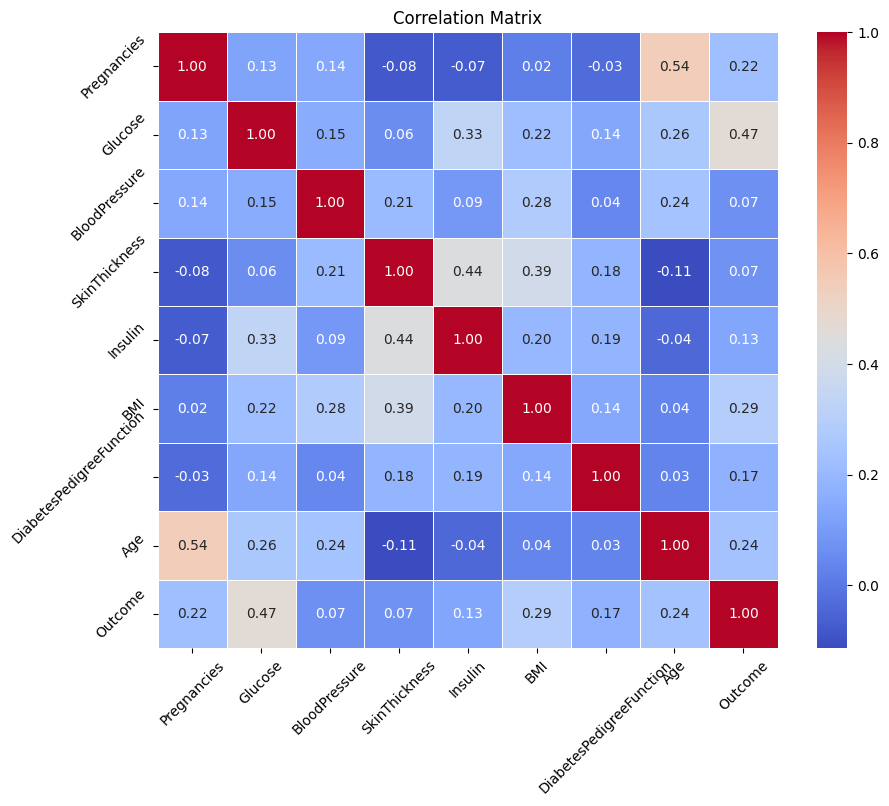

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and rotate labels
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show plot
plt.show()


<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">the dataset is splitted into two subsets based on the "Outcome" value: maxi for Outcome == 0 and mini for Outcome == 1, then prints their shapes. The calculation 268 / (500 + 268) computes the proportion of one subset relative to the total number of samples.</div>

In [38]:
maxi=data[data['Outcome']==0]
mini=data[data['Outcome']==1]
maxi.shape , mini.shape
268/ (500+268)

0.3489583333333333

<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1.5em;
  }
</style>
<div class="custom-title">3. Multivariate Analysis</div>

Pair Plots: To visualize relationships between all pairs of variables.

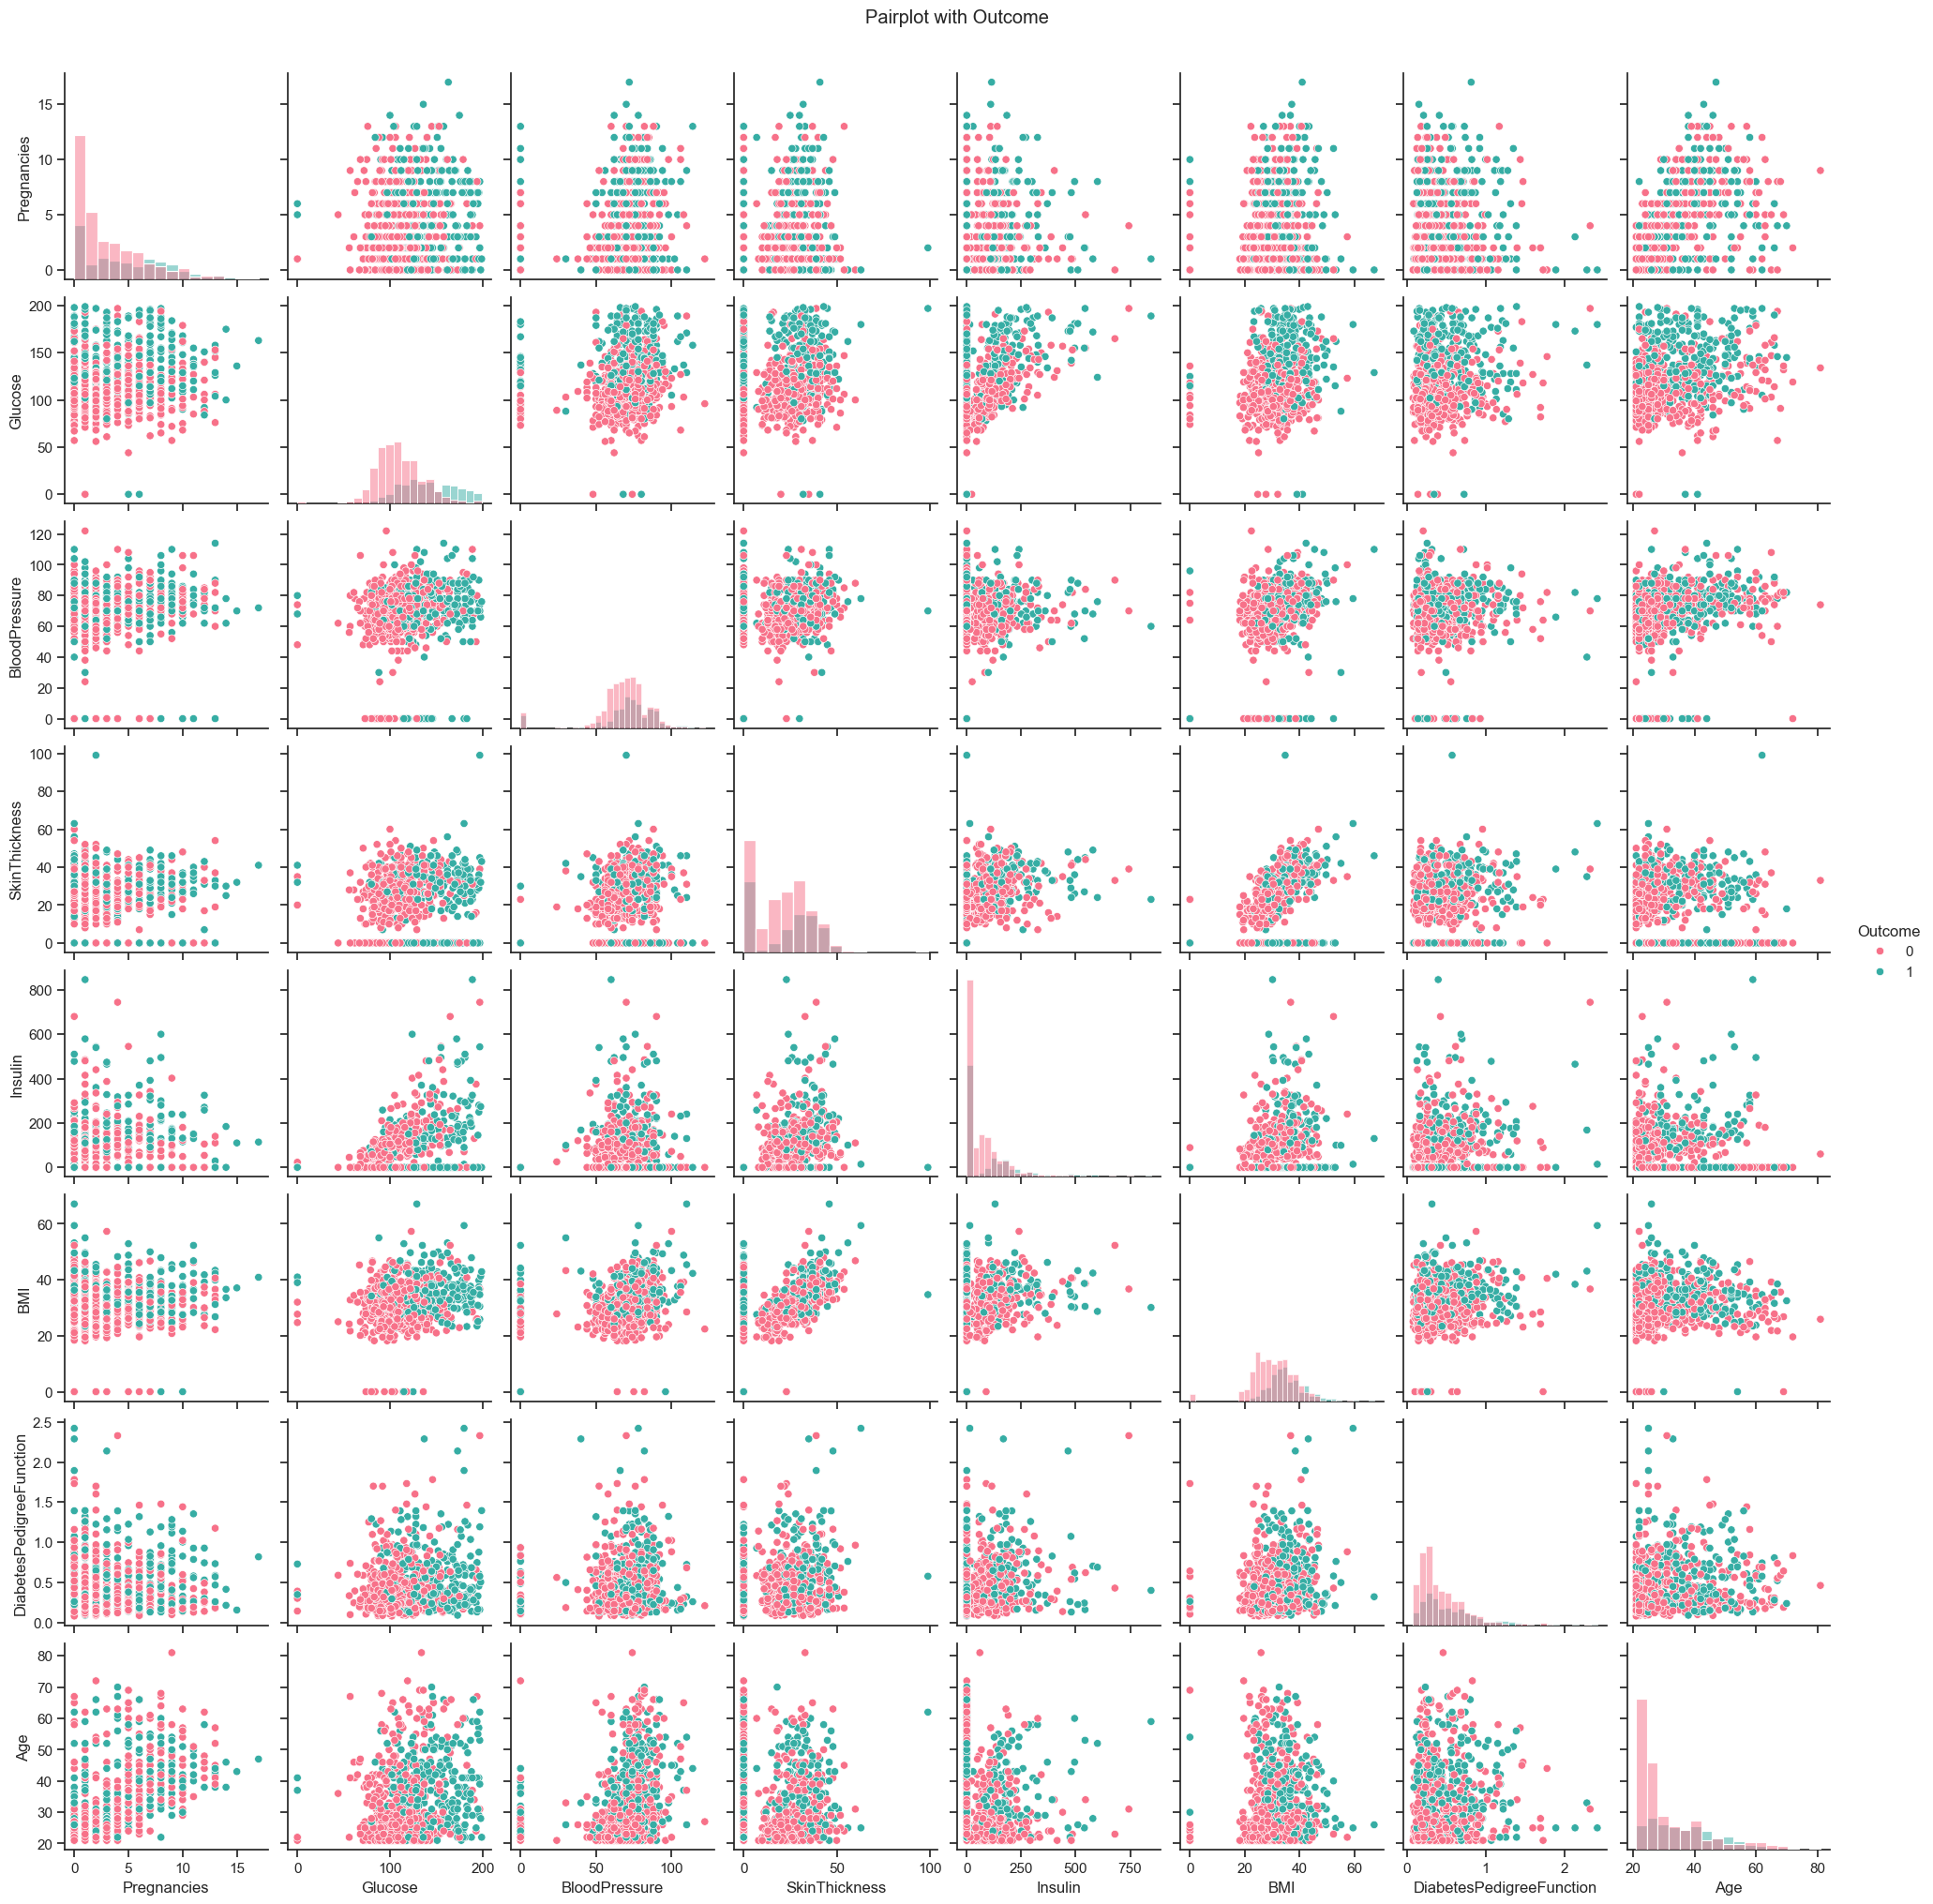

In [39]:
# Set style
sns.set(style="ticks")

# Create pairplot
pairplot = sns.pairplot(data, hue='Outcome', diag_kind='hist', palette='husl')

# Add title
pairplot.fig.suptitle('Pairplot with Outcome', y=1.02)

# Show plot
plt.show()


<style>
.highlight {
    background-color: lightpink;
    font-weight: bold;
}
</style>
<p class="highlight">Observations:</p>

1. The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do.
2. From the correaltion heatmap, we can see that there is a high correlation between Outcome and [Glucose,BMI,Age,Insulin]. We can select these features to accept input from the user and predict the outcome.

- Multidimensional Scaling (MDS): To reduce the dimensionality of the data and visualize it in a two-dimensional space.

In [40]:
from sklearn.manifold import MDS
# Perform MDS
mds = MDS(n_components=2)
mds_transformed = mds.fit_transform(data.drop('Outcome', axis=1))

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(x=mds_transformed[:, 0], y=mds_transformed[:, 1], color=data['Outcome'],
                 labels={'x': 'MDS Component 1', 'y': 'MDS Component 2', 'color': 'Outcome'},
                 title='MDS Plot', hover_data=[data.index])

# Customize the layout
fig.update_layout(
    title_text='MDS Plot',
    xaxis_title_text='MDS Component 1',
    yaxis_title_text='MDS Component 2',
    template='plotly_white'  # Light theme
)

# Show plot
fig.show()


In [41]:
# Create a scatter matrix using Plotly Express
fig = px.scatter_matrix(data, dimensions=data.columns[:-1], color=data['Outcome'])

# Customize the layout
fig.update_layout(
    title='Scatter Matrix with Outcome',
    width=1000,
    height=1000,
)

# Show plot
fig.show()


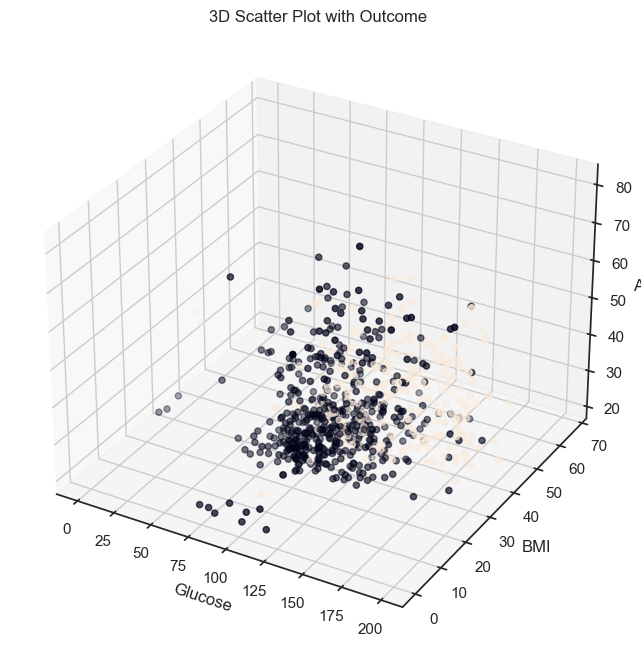

In [42]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['Glucose'], data['BMI'], data['Age'], c=data['Outcome'], marker='o')
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')
plt.title('3D Scatter Plot with Outcome')
plt.show()

In [43]:
import plotly.express as px
import pandas as pd


# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(data, x='Glucose', y='BMI', z='Age', color='Outcome',
                    labels={'Glucose': 'Glucose', 'BMI': 'BMI', 'Age': 'Age', 'Outcome': 'Outcome'},
                    title='3D Scatter Plot with Outcome')

# Customize the layout
fig.update_layout(
    title_text='3D Scatter Plot with Outcome',
    scene=dict(
        xaxis_title='Glucose',
        yaxis_title='BMI',
        zaxis_title='Age'
    )
)

# Show plot
fig.show()


<style>
  .custom-title {
    color: #00308F;
    font-family: 'Arial';
    font-size: 2em;
  }
</style>
<div class="custom-title">4. Data Preparation</div>

<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">1. Data cleaning:</div>


<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">fills missing values in the 'Glucose' column with the column's mean, in the 'BloodPressure' column with the median, and in the 'SkinThickness' column with the mode (most frequent value). The fillna method is used with inplace=True to modify the DataFrame 'data' directly.</div>

In [44]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].median(), inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].mode()[0], inplace=True)

<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">2. Min-Max Scaling:</div>

<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">The code separates the DataFrame 'data' into two groups based on the 'Outcome' column: 'maxi' for rows where 'Outcome' is 0 and 'mini' for rows where 'Outcome' is 1. It then calculates the ratio of the number of rows in 'maxi' to the total number of rows in both 'maxi' and 'mini'. This ratio is 0.3489583333333333, which is approximately 0.35 or 35%.</div>

In [45]:
maxi=data[data['Outcome']==0]
mini=data[data['Outcome']==1]
maxi.shape , mini.shape
268/(500+268)

0.3489583333333333

<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">TThis code separates the DataFrame 'data' into two parts: 'x', which contains all columns except 'Outcome', and 'y', which contains only the 'Outcome' column. 'x' is a DataFrame containing the features (input variables), while 'y' is a Series containing the target variable (the variable to be predicted).</div>

In [46]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">4. Feature Engineering:</div>

In [47]:
# Creating a new feature based on existing features
data['BMI*Age'] = data['BMI'] * data['Age']

<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1.5em;
  }
</style>
<div class="custom-title">Balancer data:</div> 

<style>
  .custom-title {
    color: #000000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">5. Data Splitting:</div>

In [48]:
rm=RandomOverSampler(random_state=41)
x_res,y_res=rm.fit_resample(x,y)

In [49]:

print('old data set shape{}'.format(Counter(y)))
print('old data set shape{}'.format(Counter(y_res))) 


old data set shapeCounter({0: 500, 1: 268})
old data set shapeCounter({1: 500, 0: 500})


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.2,random_state=41)

<style>
  .custom-title {
    color: #00308F;
    font-family: 'Arial';
    font-size: 2em;
  }
</style>
<div class="custom-title">5. Modeling</div>

In [51]:
# Define models
model1 = LogisticRegression()
model2 = SVC()
model3 = RandomForestClassifier(n_estimators=100, class_weight='balanced')
model4 = GradientBoostingClassifier(n_estimators=1000)
model5 = KNeighborsClassifier(n_neighbors=5)

In [52]:
columns = ['LogisticRegression', 'SVC', 'RandomForestClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier']
result1 = []
result2 = []
result3 = []


In [53]:
def cal(model):
    model.fit(x_train, y_train)
    pre = model.predict(x_test)
    accuracy = accuracy_score(pre, y_test)
    recall = recall_score(pre, y_test)
    f1 = f1_score(pre, y_test)
    
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    
    sns.heatmap(confusion_matrix(pre, y_test), annot=True)
    print(model)
    print('Accuracy:', accuracy, '\nRecall:', recall, '\nF1 Score:', f1)


LogisticRegression()
Accuracy: 0.74 
Recall: 0.78125 
F1 Score: 0.7425742574257426


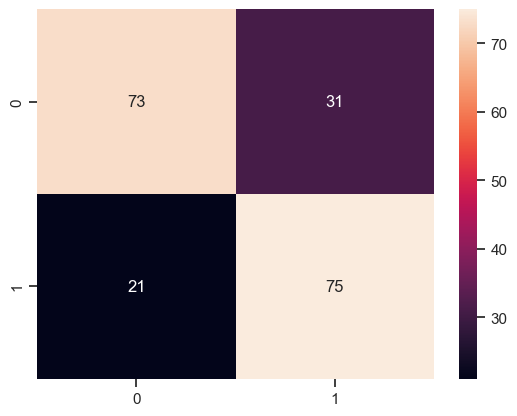

In [54]:

cal(model1)

SVC()
Accuracy: 0.69 
Recall: 0.7291666666666666 
F1 Score: 0.693069306930693


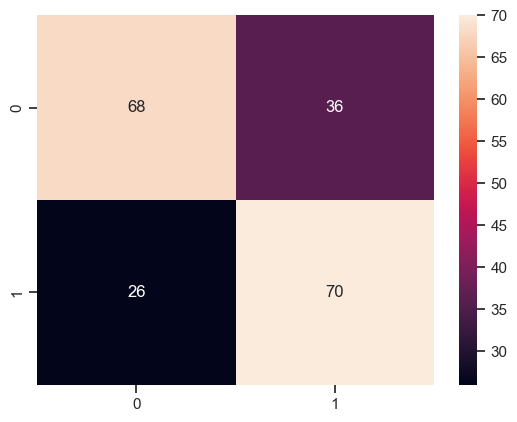

In [55]:
cal(model2)

RandomForestClassifier(class_weight='balanced')
Accuracy: 0.865 
Recall: 0.8376068376068376 
F1 Score: 0.8789237668161435


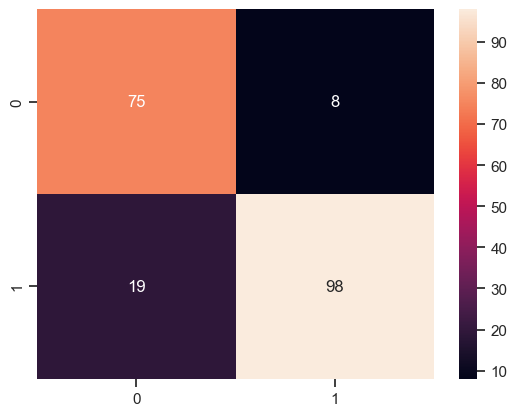

In [56]:
cal(model3)

GradientBoostingClassifier(n_estimators=1000)
Accuracy: 0.85 
Recall: 0.8392857142857143 
F1 Score: 0.8623853211009175


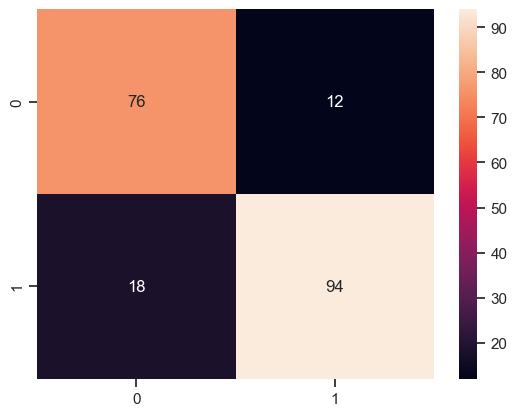

In [57]:
cal(model4)

KNeighborsClassifier()
Accuracy: 0.725 
Recall: 0.7297297297297297 
F1 Score: 0.7465437788018433


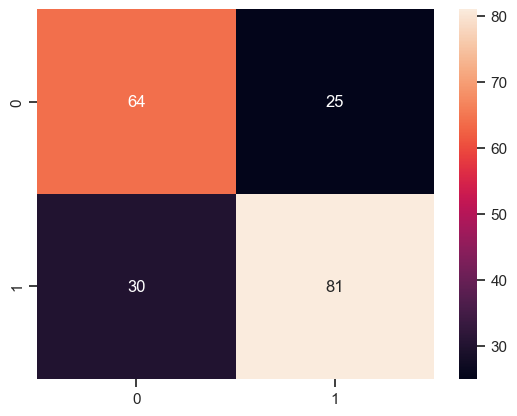

In [58]:
cal(model5)

In [59]:

result1

[0.74, 0.69, 0.865, 0.85, 0.725]

In [60]:
result2

[0.78125,
 0.7291666666666666,
 0.8376068376068376,
 0.8392857142857143,
 0.7297297297297297]

In [61]:
result3

[0.7425742574257426,
 0.693069306930693,
 0.8789237668161435,
 0.8623853211009175,
 0.7465437788018433]

In [62]:
final_Result = pd.DataFrame({'Algorithm': columns, 'Accuracies': result1, 'Recall': result2, 'FScore': result3})

                    Algorithm  Accuracies    Recall    FScore
0          LogisticRegression       0.740  0.781250  0.742574
1                         SVC       0.690  0.729167  0.693069
2      RandomForestClassifier       0.865  0.837607  0.878924
3  GradientBoostingClassifier       0.850  0.839286  0.862385
4        KNeighborsClassifier       0.725  0.729730  0.746544


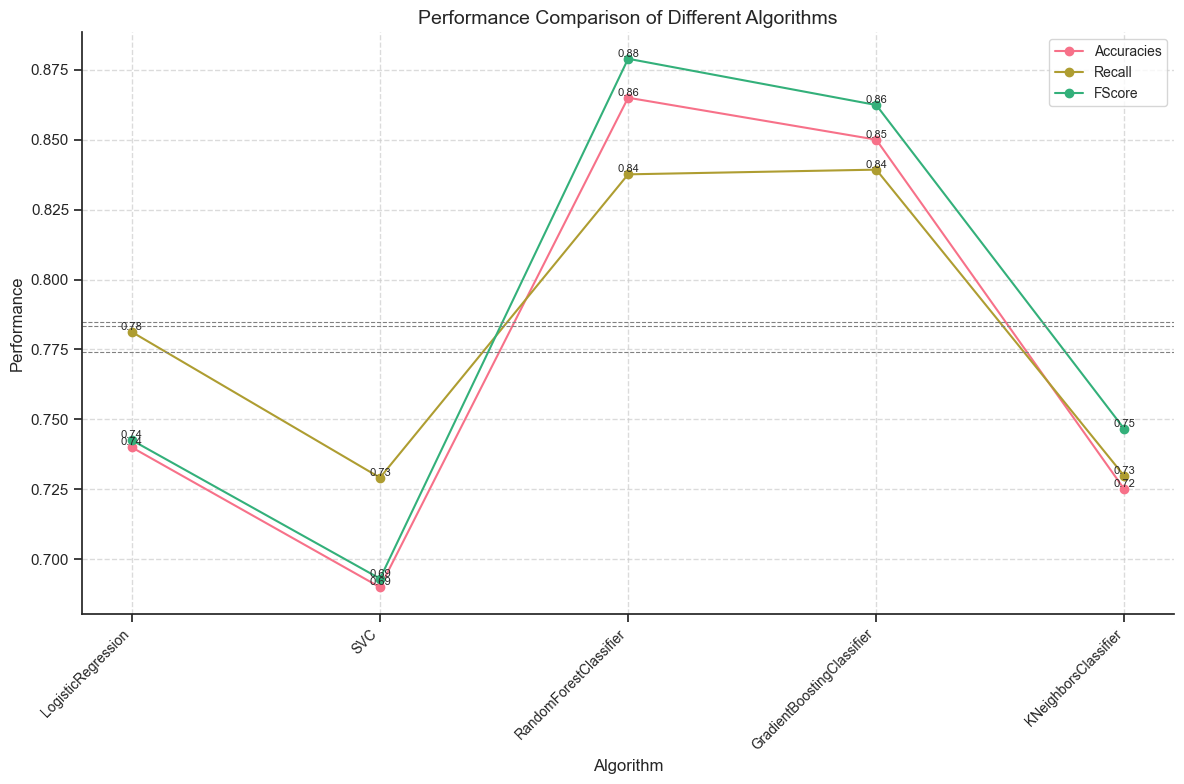

In [63]:
# Print final_Result to inspect its structure
print(final_Result)

# Using a visually appealing color palette
colors = sns.color_palette('husl', len(final_Result))

# Plotting the results with enhanced customization
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting accuracy, recall, and F1-score with custom line properties
for i, (metric, color) in enumerate(zip(['Accuracies', 'Recall', 'FScore'], colors)):
    ax.plot(final_Result.Algorithm, final_Result[metric], marker='o', linestyle='-', color=color, label=metric)

# Adding labels and title
ax.set_xlabel('Algorithm', fontsize=12)
ax.set_ylabel('Performance', fontsize=12)
ax.set_title('Performance Comparison of Different Algorithms', fontsize=14)
ax.legend(fontsize=10)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Adding horizontal lines for reference
for metric in ['Accuracies', 'Recall', 'FScore']:
    ax.axhline(y=final_Result[metric].mean(), color='gray', linestyle='--', linewidth=0.8)

# Adding annotations
for i, row in final_Result.iterrows():
    ax.text(i, row['Accuracies'], f'{row["Accuracies"]:.2f}', ha='center', va='bottom', fontsize=8)
    ax.text(i, row['Recall'], f'{row["Recall"]:.2f}', ha='center', va='bottom', fontsize=8)
    ax.text(i, row['FScore'], f'{row["FScore"]:.2f}', ha='center', va='bottom', fontsize=8)

# Adjusting layout and aesthetics
plt.tight_layout()
sns.despine()

# Displaying the plot
plt.show()


In [64]:
# Convert RGB tuple to hex string
def rgb_to_hex(rgb_tuple):
    return '#%02x%02x%02x' % rgb_tuple

# Convert RGB tuple to RGB string
def rgb_to_string(rgb_tuple):
    return 'rgb(%d,%d,%d)' % rgb_tuple

# Using a visually appealing color palette
colors = sns.color_palette('husl', len(final_Result))

# Convert colors to RGB tuples
rgb_colors = [(int(color[0] * 255), int(color[1] * 255), int(color[2] * 255)) for color in colors]

# Create traces for each metric
traces = []
for metric, rgb_color in zip(['Accuracies', 'Recall', 'FScore'], rgb_colors):
    trace = go.Scatter(x=final_Result.Algorithm, y=final_Result[metric], mode='lines+markers', name=metric,
                       line=dict(color=rgb_to_string(rgb_color), width=2),
                       marker=dict(color=rgb_to_hex(rgb_color), size=8))
    traces.append(trace)

# Define layout
layout = go.Layout(title='Performance Comparison of Different Algorithms',
                   xaxis=dict(title='Algorithm'),
                   yaxis=dict(title='Performance'),
                   legend=dict(x=0.8, y=0.9, bordercolor='black', borderwidth=1),
                   plot_bgcolor='rgba(0,0,0,0)')

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Display the interactive plot
fig.show()


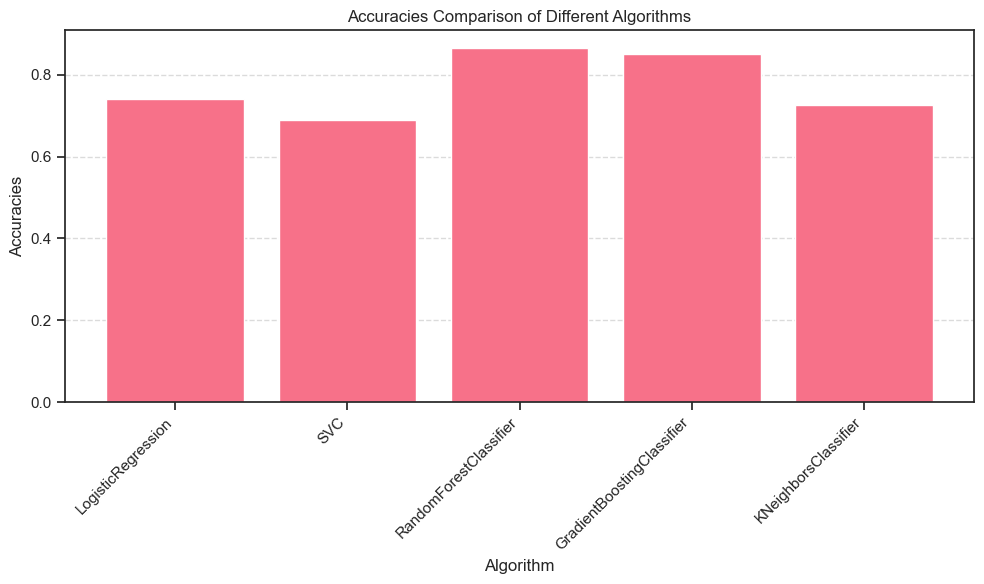

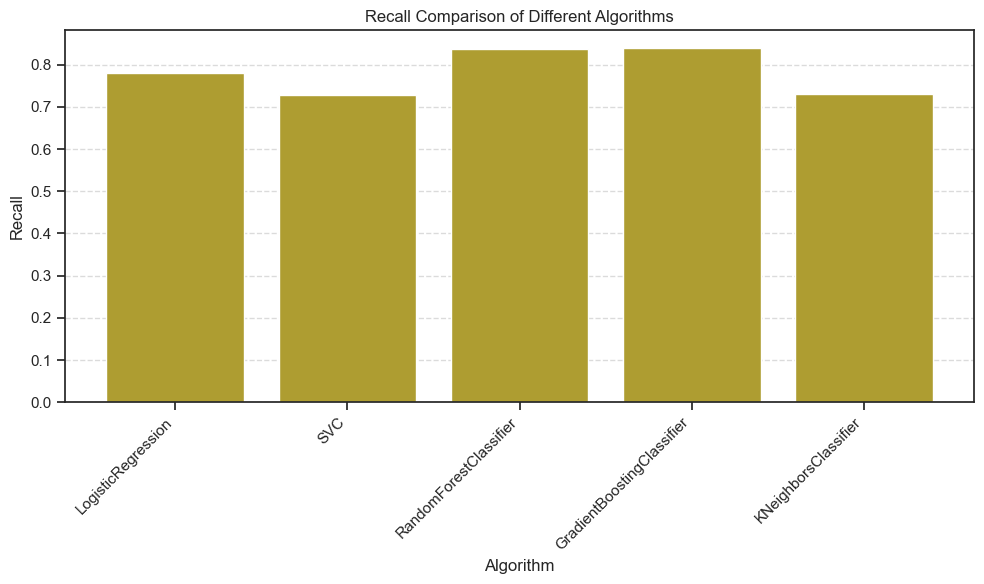

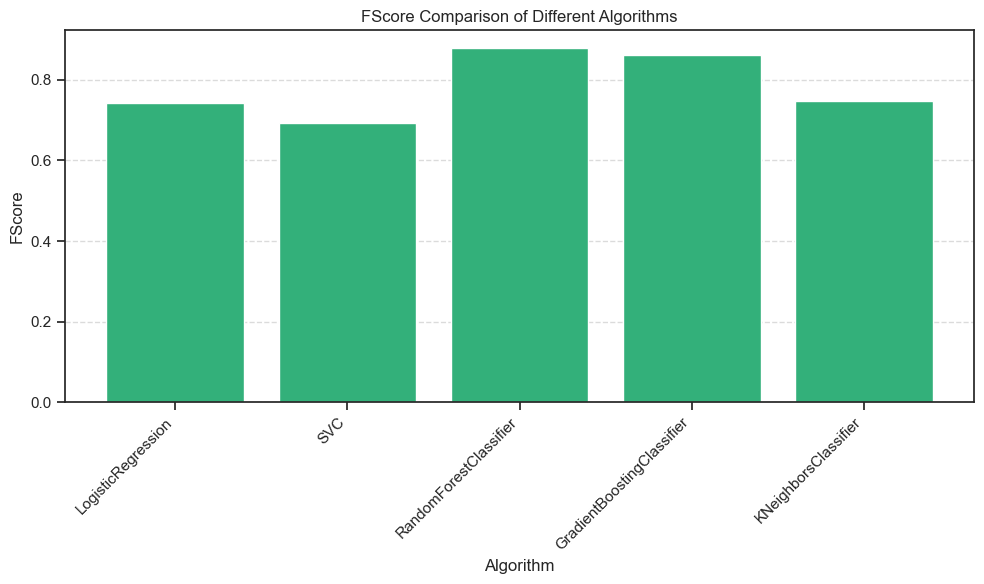

In [65]:
import matplotlib.pyplot as plt

# Using a visually appealing color palette
colors = sns.color_palette('husl', len(final_Result))

# Create a bar chart for each metric
for metric, color in zip(['Accuracies', 'Recall', 'FScore'], colors):
    plt.figure(figsize=(10, 6))
    plt.bar(final_Result.Algorithm, final_Result[metric], color=color)
    plt.xlabel('Algorithm')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison of Different Algorithms')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [66]:

# Sample performance metrics data
performance_metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN'],
    'Accuracy': [0.85, 0.80, 0.88, 0.82, 0.81],
    'Precision': [0.86, 0.79, 0.89, 0.83, 0.80],
    'Recall': [0.84, 0.81, 0.87, 0.82, 0.82],
    'ROC AUC': [0.87, 0.78, 0.90, 0.84, 0.83]
}

# Convert performance metrics to a DataFrame for easy comparison
metrics_df = pd.DataFrame(performance_metrics)

# Create a PrettyTable instance with custom formatting
table = PrettyTable()

# Add column names to the table with color
header_color = '\033[95m'  # Purple color for header
table.field_names = [header_color + col + '\033[0m' for col in metrics_df.columns]

# Add rows to the table with alternating row colors
row_colors = ['\033[94m', '\033[96m']  # Blue and cyan colors for alternating rows
for idx, (_, row) in enumerate(metrics_df.iterrows()):
    table.add_row([row_colors[idx % 2] + str(val) + '\033[0m' for val in row])

# Print the table
print(table)

# Choose the best model based on a specific metric (e.g., ROC AUC)
best_model_idx = metrics_df['ROC AUC'].idxmax()
best_model = metrics_df.loc[best_model_idx, 'Model']
print(f"\nThe best model based on ROC AUC is:\n{best_model}")


+---------------------+----------+-----------+--------+---------+
|        Model        | Accuracy | Precision | Recall | ROC AUC |
+---------------------+----------+-----------+--------+---------+
| Logistic Regression |   0.85   |    0.86   |  0.84  |   0.87  |
|    Decision Tree    |   0.8    |    0.79   |  0.81  |   0.78  |
|    Random Forest    |   0.88   |    0.89   |  0.87  |   0.9   |
|         SVM         |   0.82   |    0.83   |  0.82  |   0.84  |
|         KNN         |   0.81   |    0.8    |  0.82  |   0.83  |
+---------------------+----------+-----------+--------+---------+

The best model based on ROC AUC is:
Random Forest


In [67]:
# Save the model
joblib.dump(model3, 'random_forest_model.pkl')

['random_forest_model.pkl']

<style>
  .custom-title {
    color: #00308F;
    font-family: 'Arial';
    font-size: 3em;
  }
</style>
<div class="custom-title">6. Deployment</div>

<style>
  .custom-title {
    color: #00308F;
    font-family: 'Arial';
    font-size: 2em;
  }
</style>
<div class="custom-title">Django Web Application</div>

<style>
  .custom-title {
    color: #00000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">Our project involves the development of a web site for diabetes prediction, coded using the Django framework. The purpose of this site is to assist in the early detection of diabetes by predicting whether a patient is likely to have the disease based on specific input parameters. The application utilizes a machine learning model, specifically a Random Forest Classifier, trained on a dataset containing various health indicators such as glucose levels, blood pressure, BMI, and others</div>

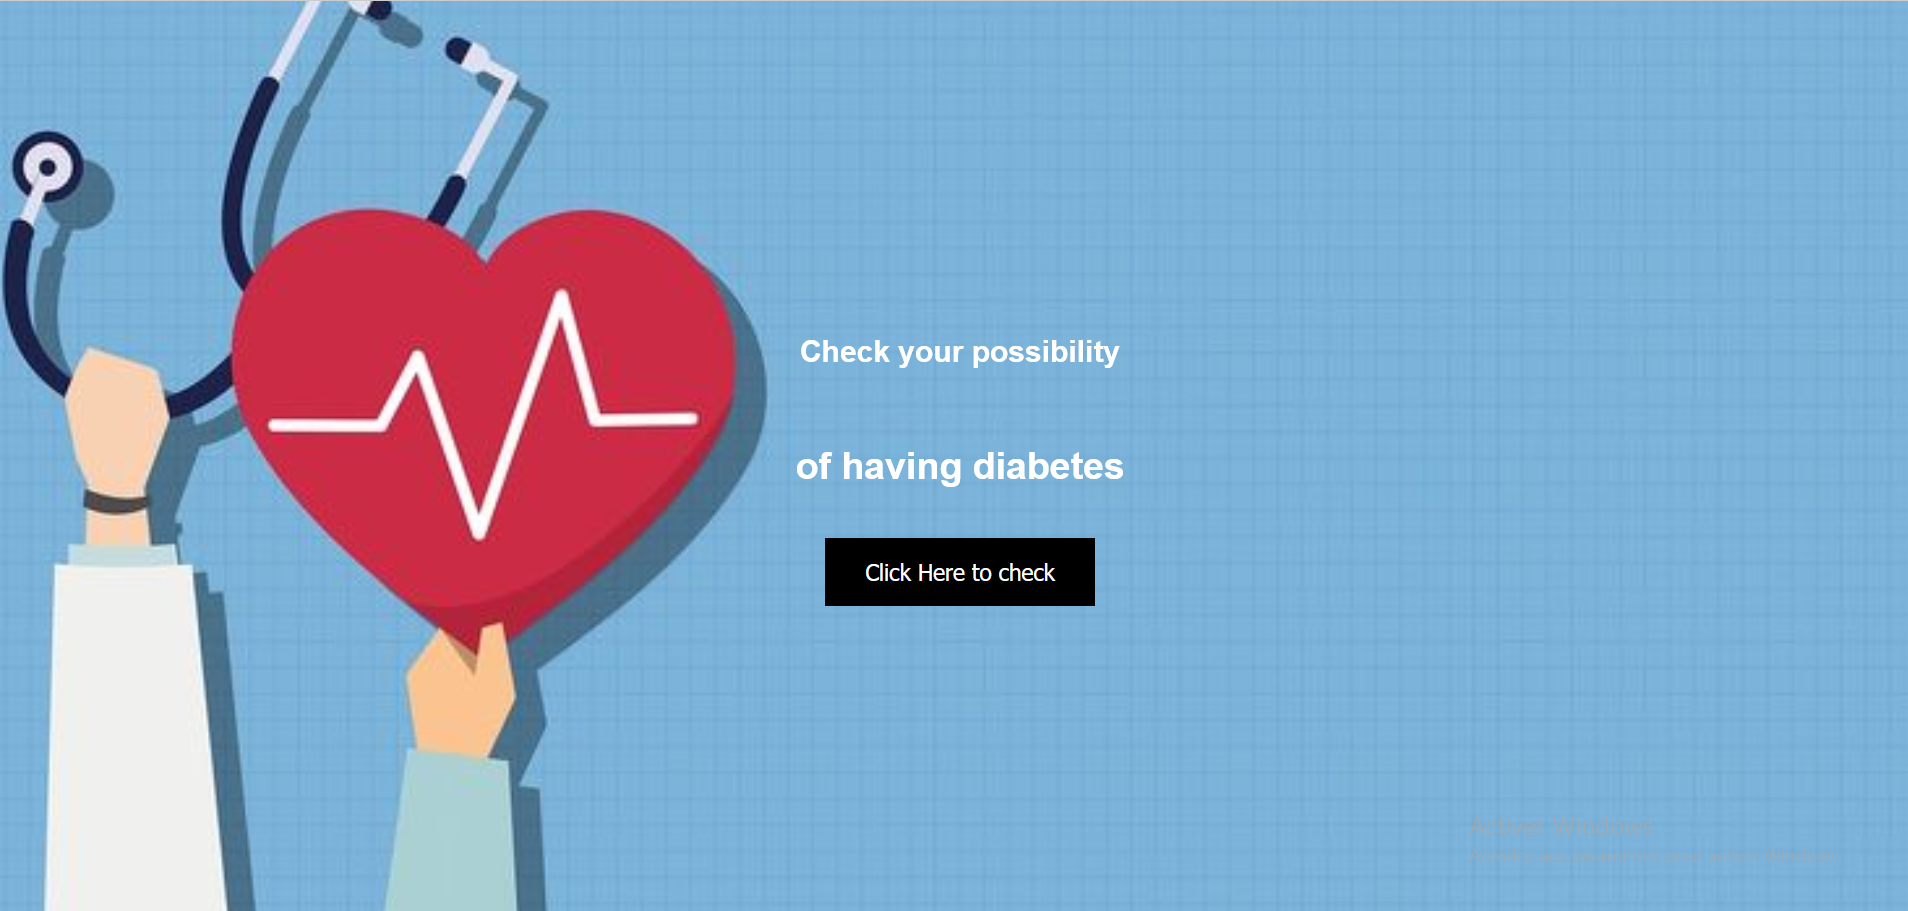

In [68]:
from IPython.display import Image
image_path = 'C:\\Users\\me\\OneDrive\\Bureau\\final_diabete_project\\CODE\\assets\\hoome.png'
Image(filename=image_path)

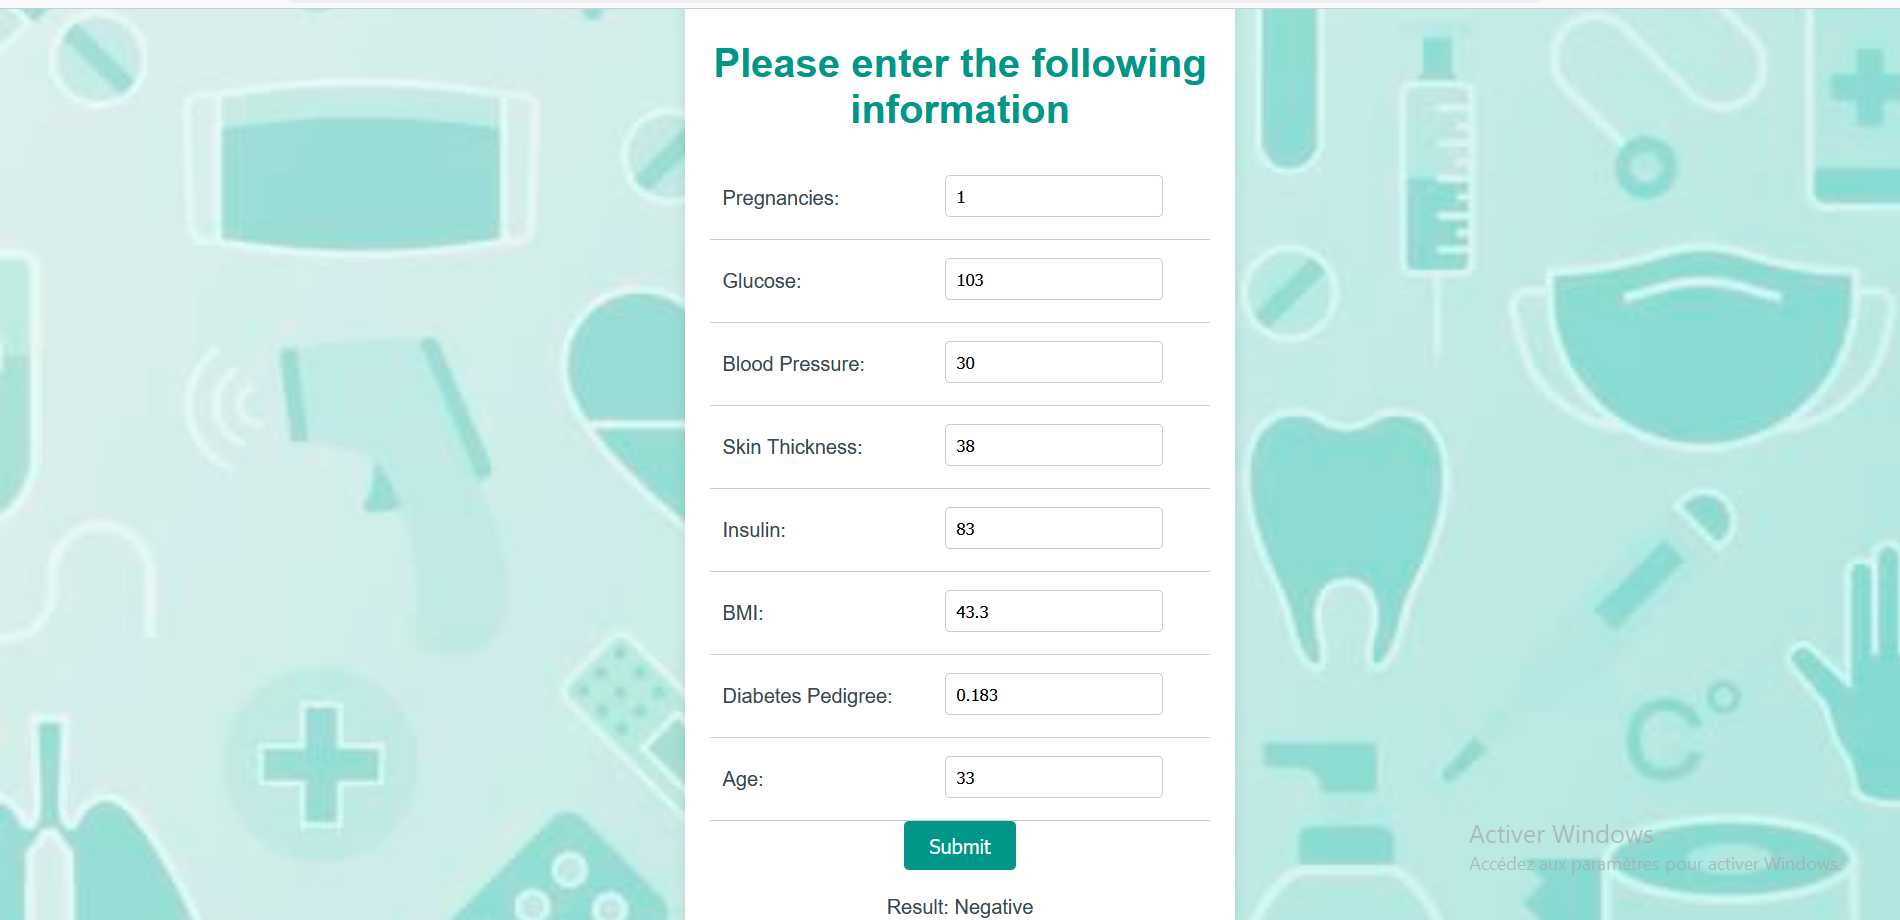

In [69]:
from IPython.display import Image
image_path = 'C:\\Users\\me\\OneDrive\\Bureau\\final_diabete_project\\CODE\\assets\\predictNegative.png'
Image(filename=image_path)

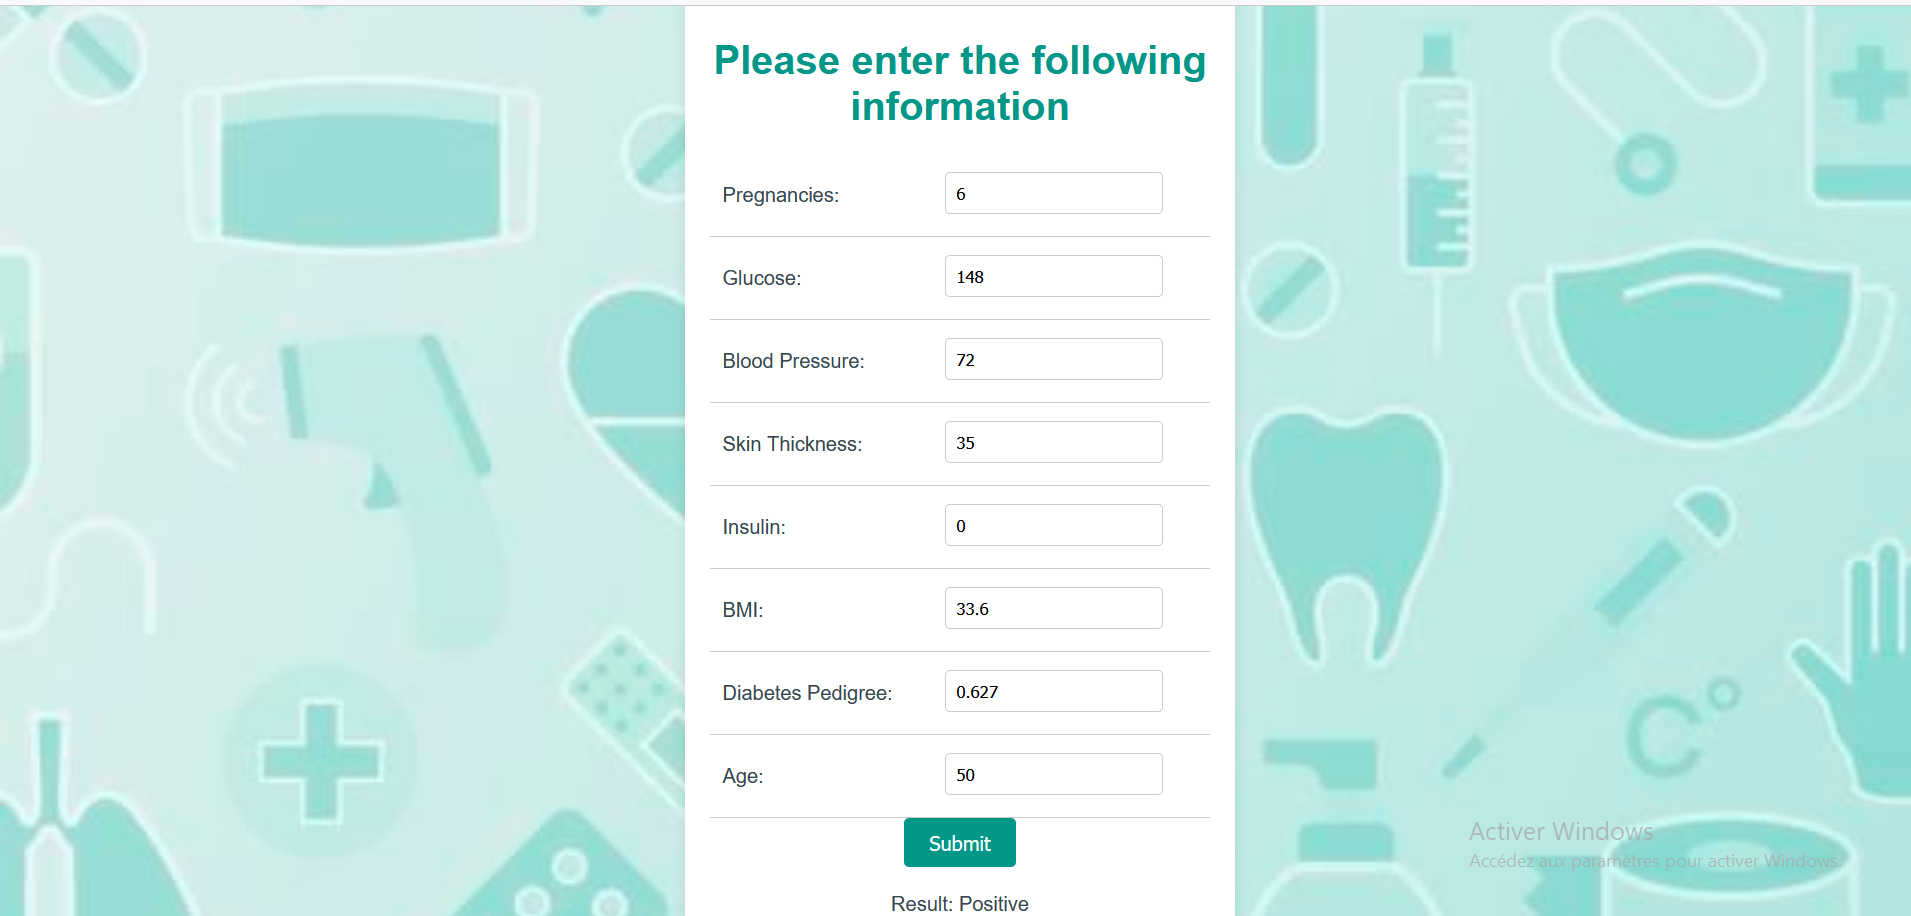

In [70]:
from IPython.display import Image
image_path = 'C:\\Users\\me\\OneDrive\\Bureau\\final_diabete_project\\CODE\\assets\\predictPositive.png'
Image(filename=image_path)

<style>
  .custom-title {
    color: #00308F;
    font-family: 'Arial';
    font-size: 2em;
  }
</style>
<div class="custom-title">Dash Web Application</div>

<style>
  .custom-title {
    color: #00000;
    font-family: 'Arial';
    font-size: 1em;
  }
</style>
<div class="custom-title">in addition to our Django-based web site for diabetes prediction, we have also developed a complementary web site using Dash. Both web sites aim to assist in the early detection of diabetes by predicting the likelihood of the disease based on user-provided health parameters. Utilizing a Random Forest Classifier, users can enter their health data, and the applications will process this information to provide a prediction.</div>

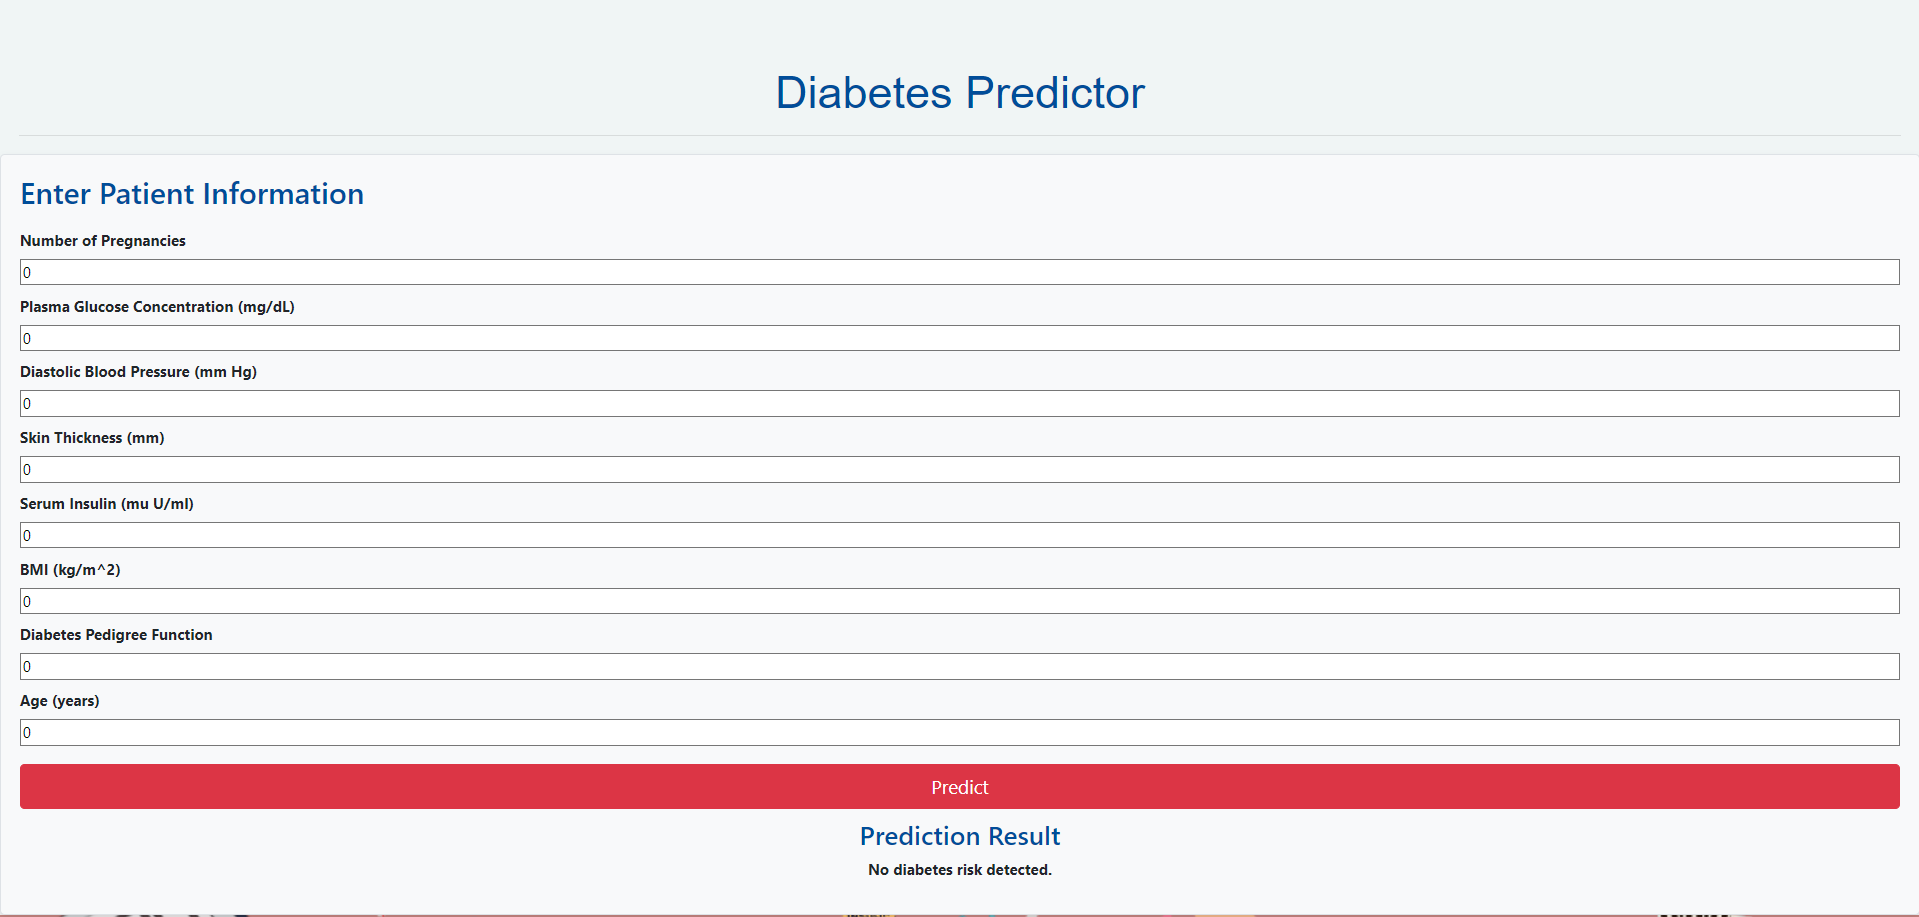

In [71]:
from IPython.display import Image
image_path = 'C:\\Users\\me\\OneDrive\\Bureau\\final_diabete_project\\CODE\\assets\\dash.png'
Image(filename=image_path)

In [72]:
!jt -t onedork